In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
#pip install lightgbm==3.3.5

In [3]:
path = "profiles.csv"

df = pd.read_csv(path)

In [14]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


For the essay columns:
- essay0 - My self summary
- essay1 - What I’m doing with my life
- essay2 - I’m really good at
- essay3 - The first thing people usually notice about me
- essay4 - Favorite books, movies, show, music, and food
- essay5 - The six things I could never do without
- essay6 - I spend a lot of time thinking about
- essay7 - On a typical Friday night I am
- essay8 - The most private thing I am willing to admit
- essay9 - You should message me if…

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [16]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


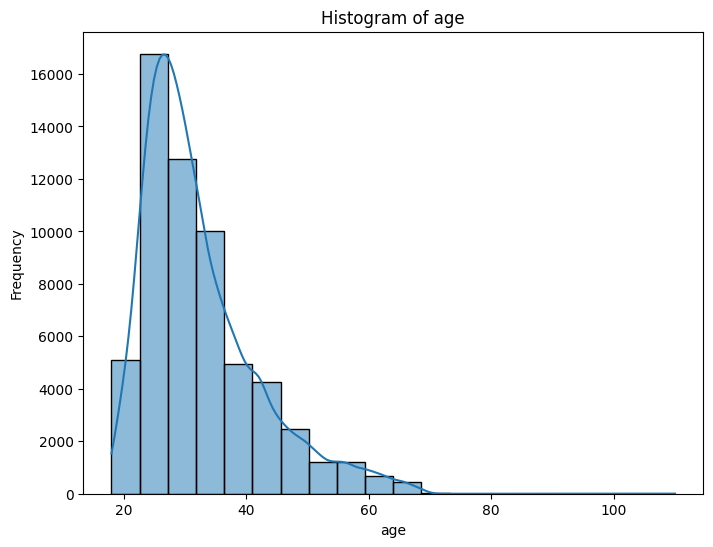

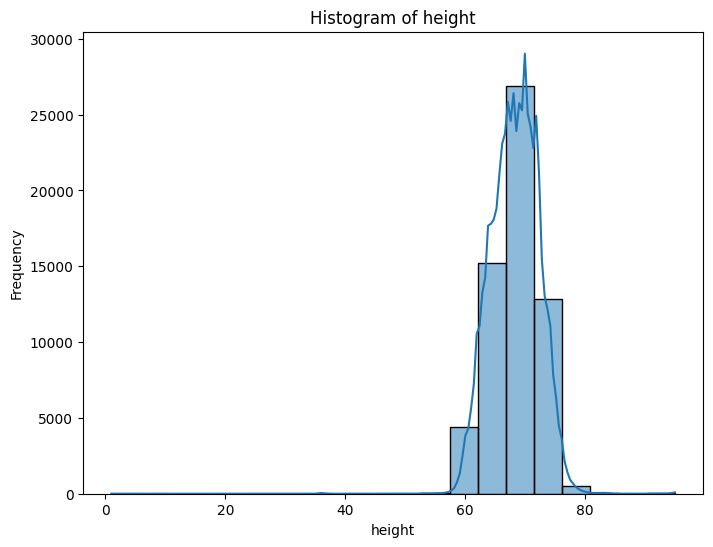

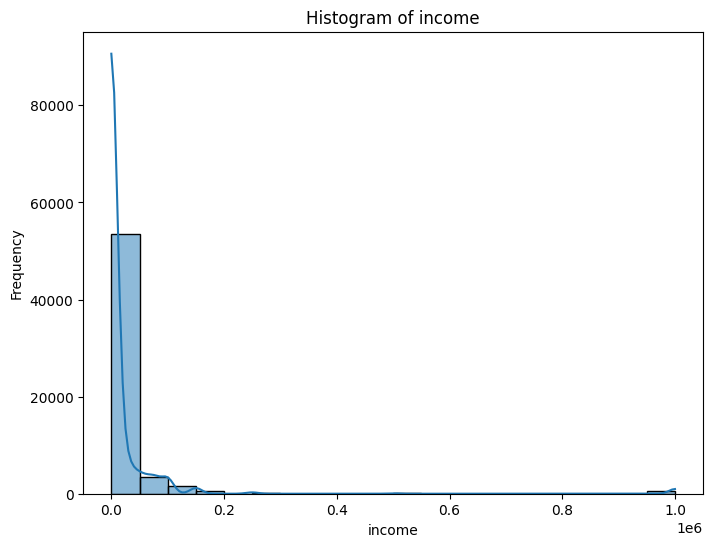

In [26]:
# Histogram for numerical data
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

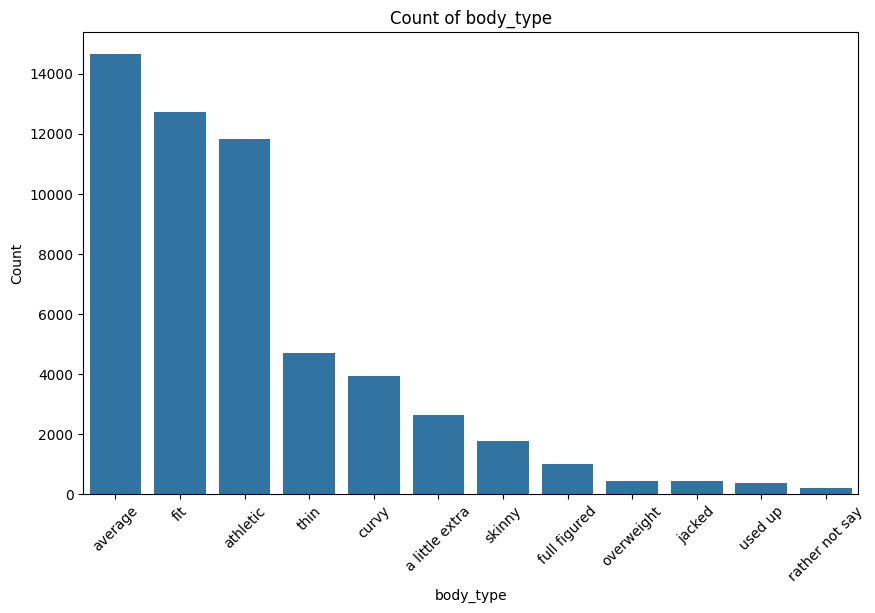

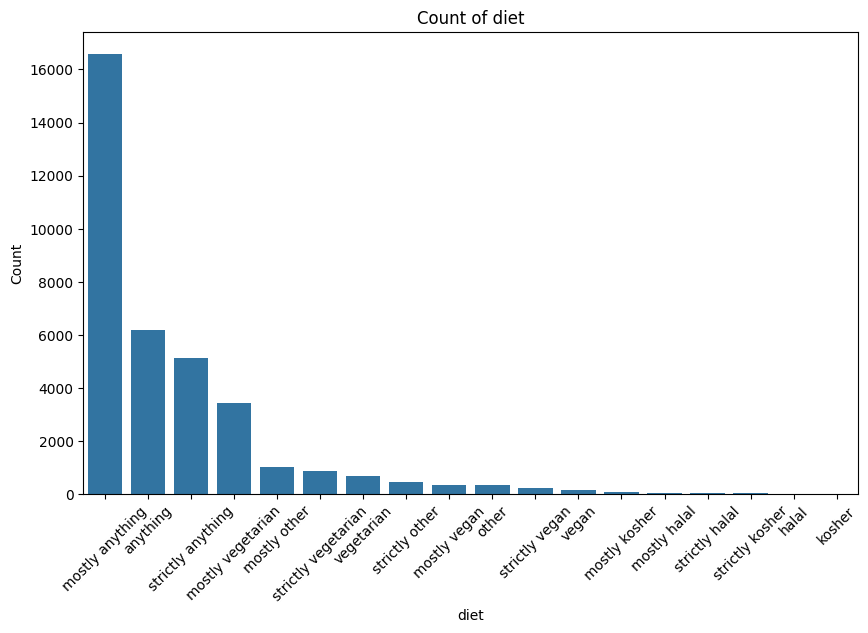

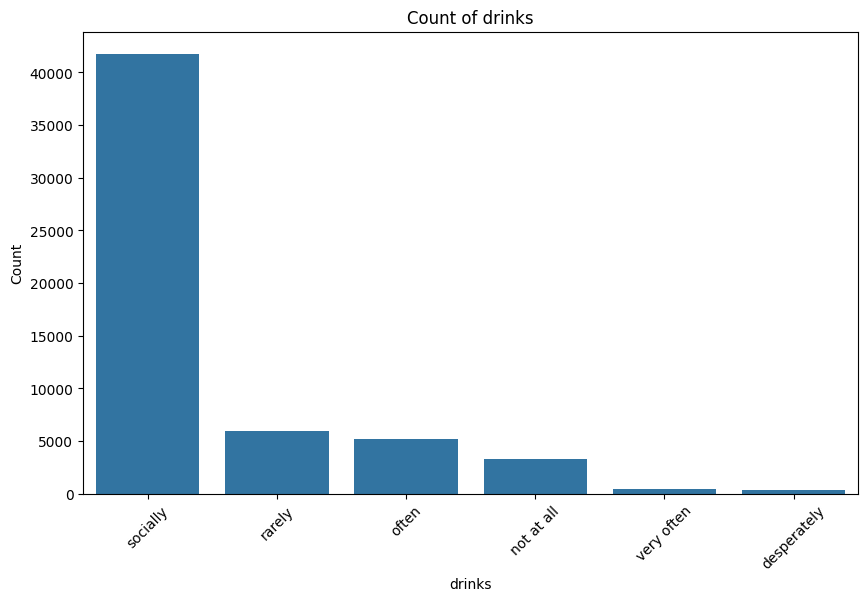

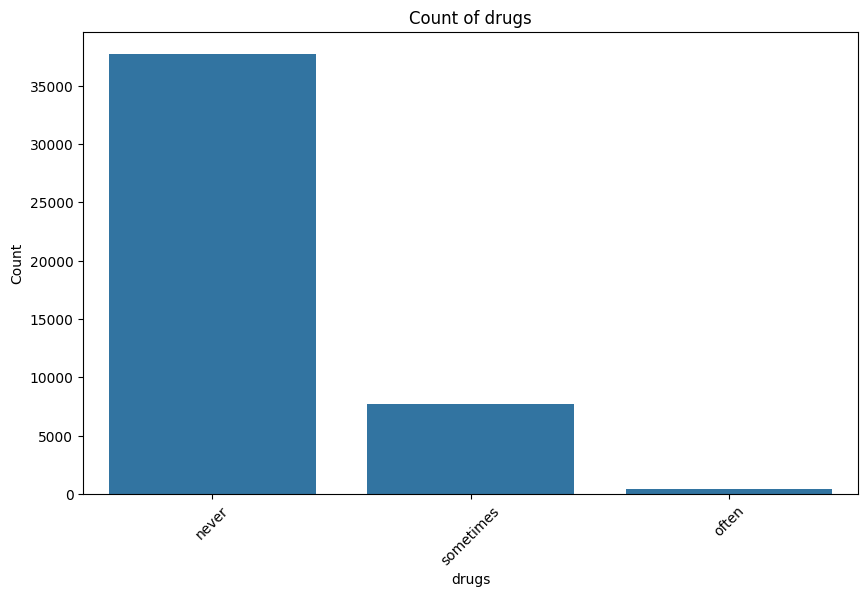

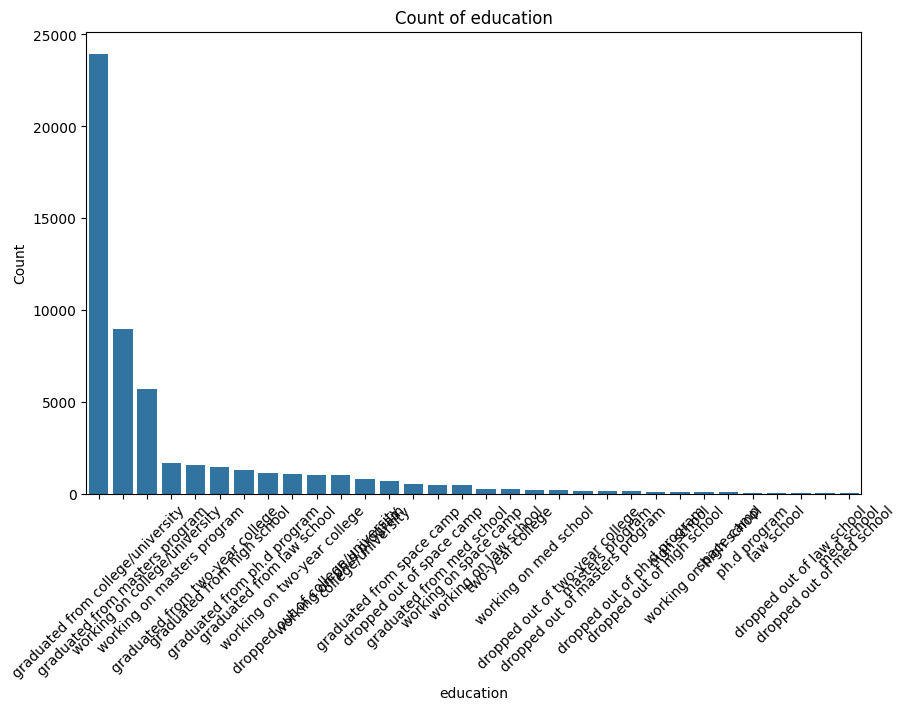

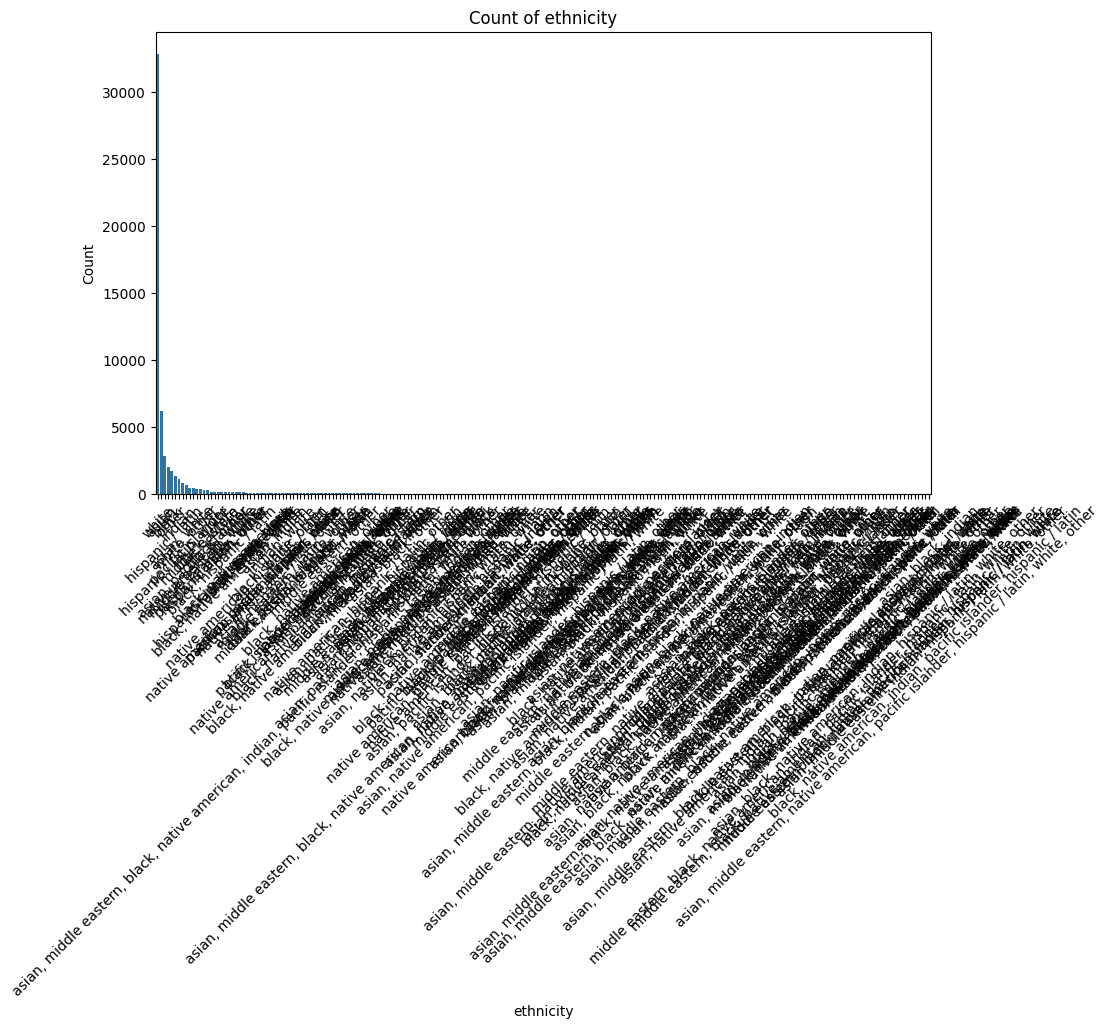

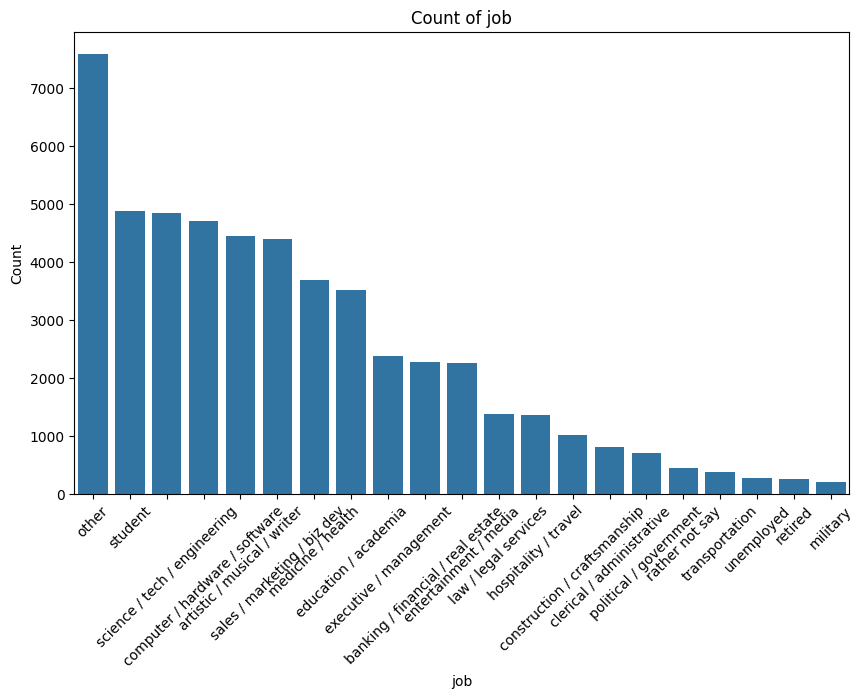

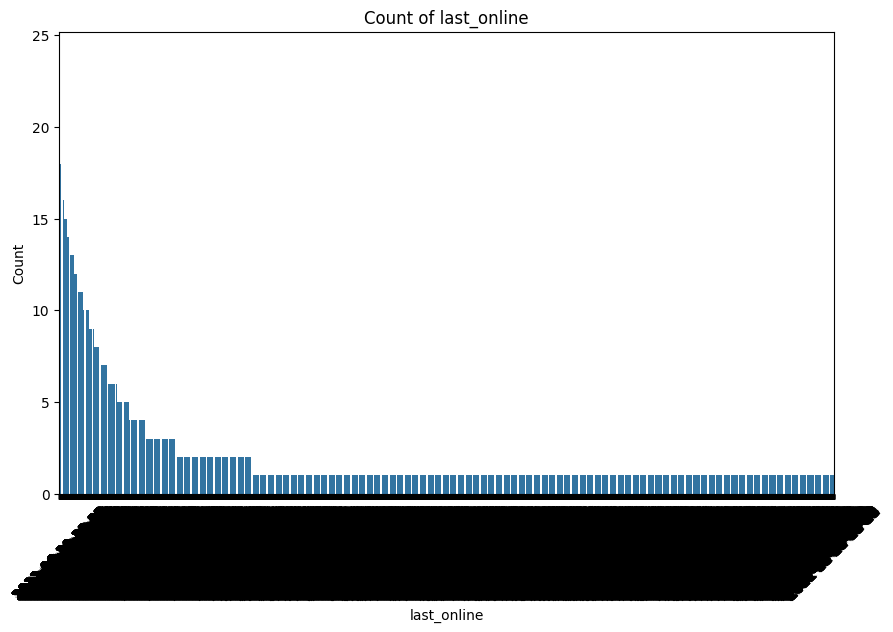

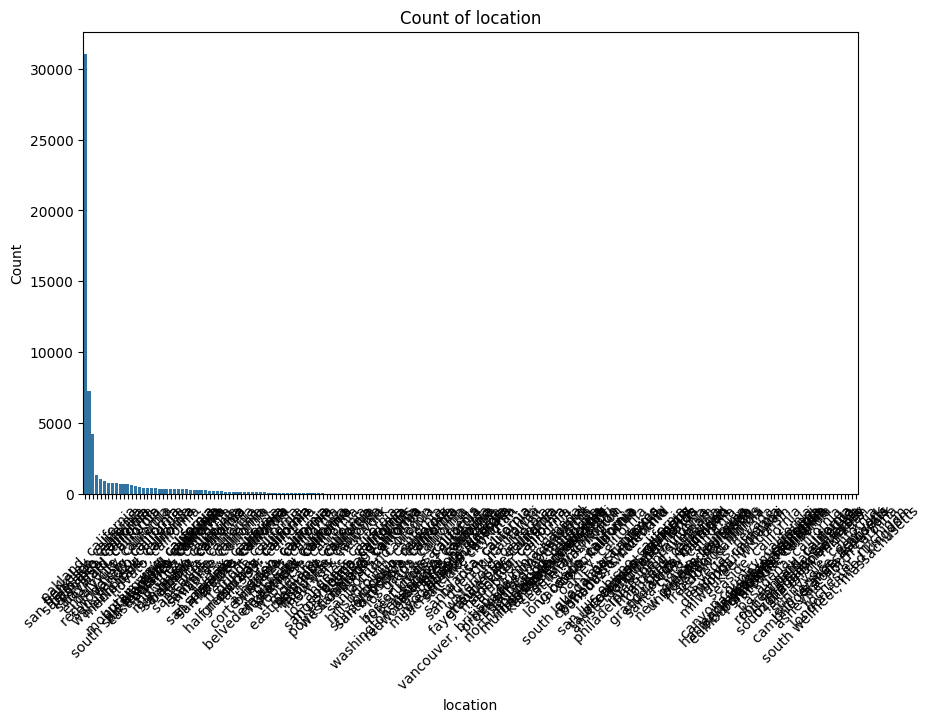

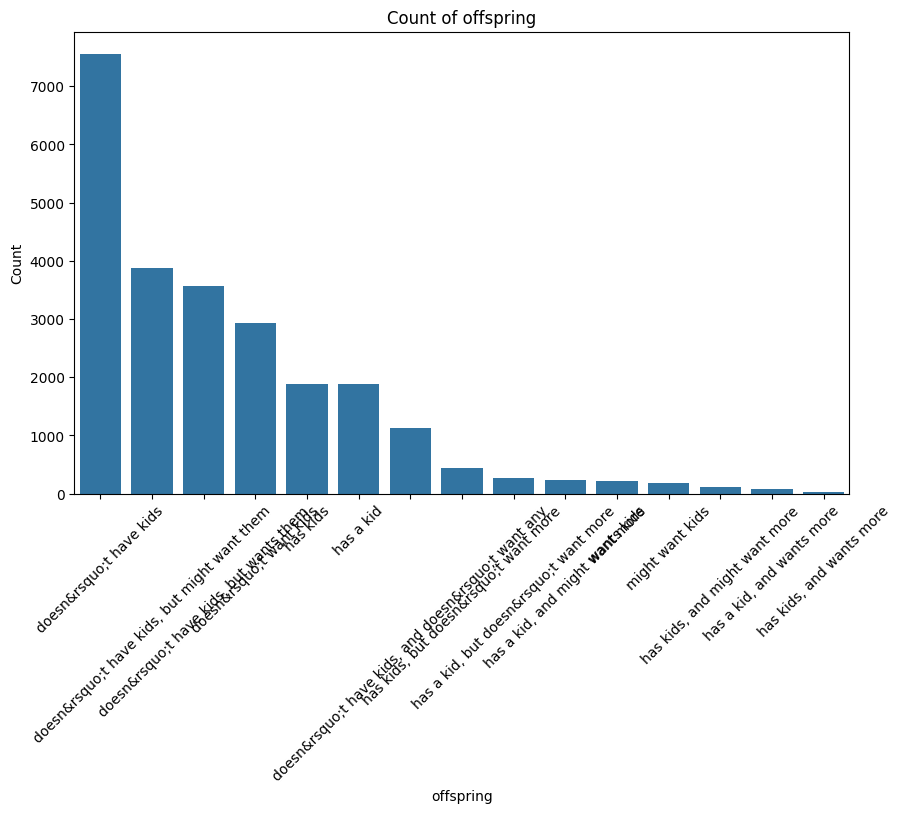

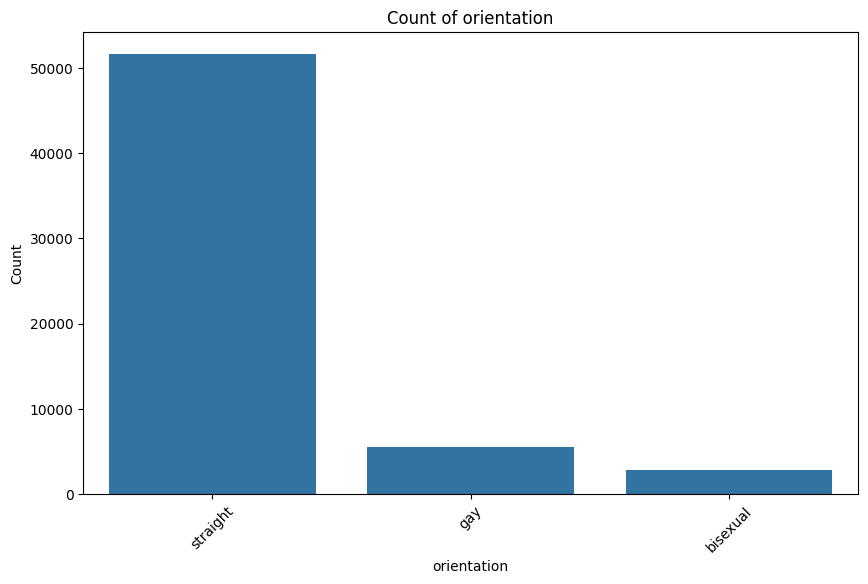

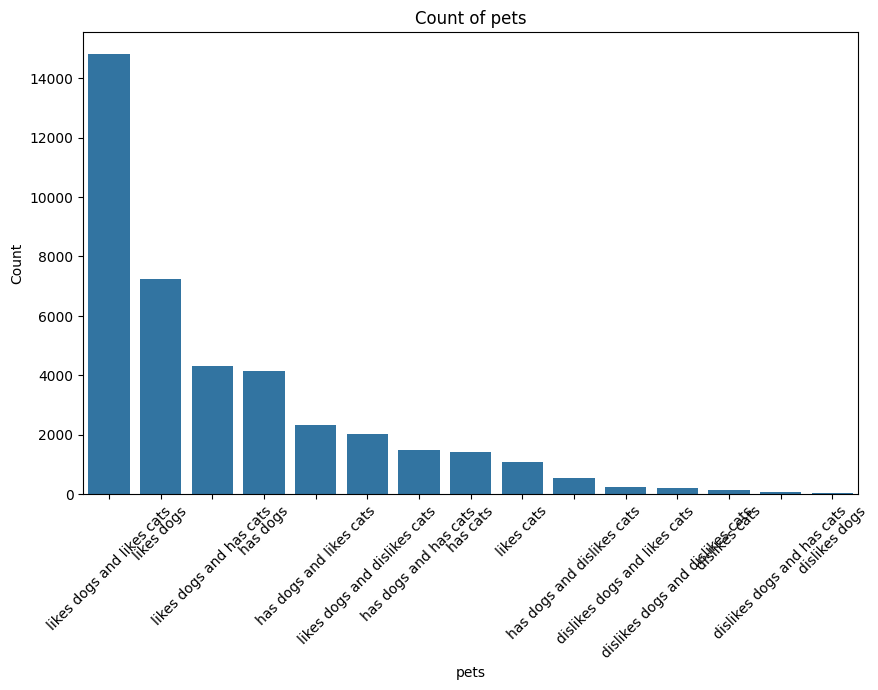

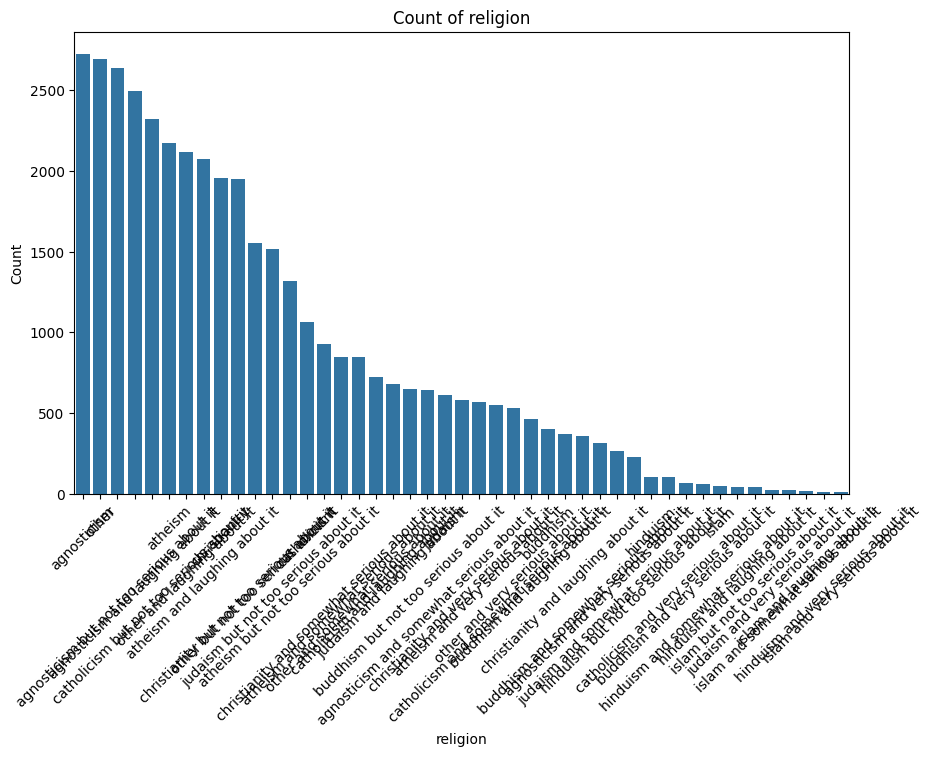

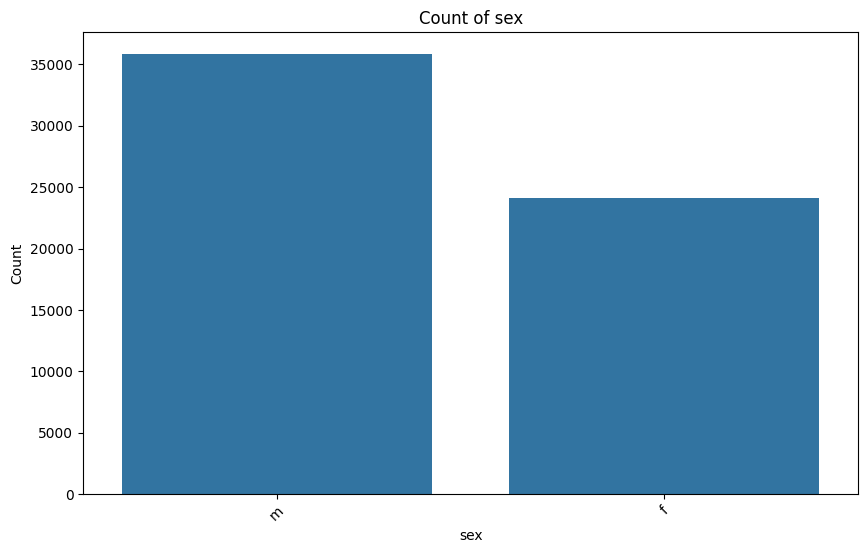

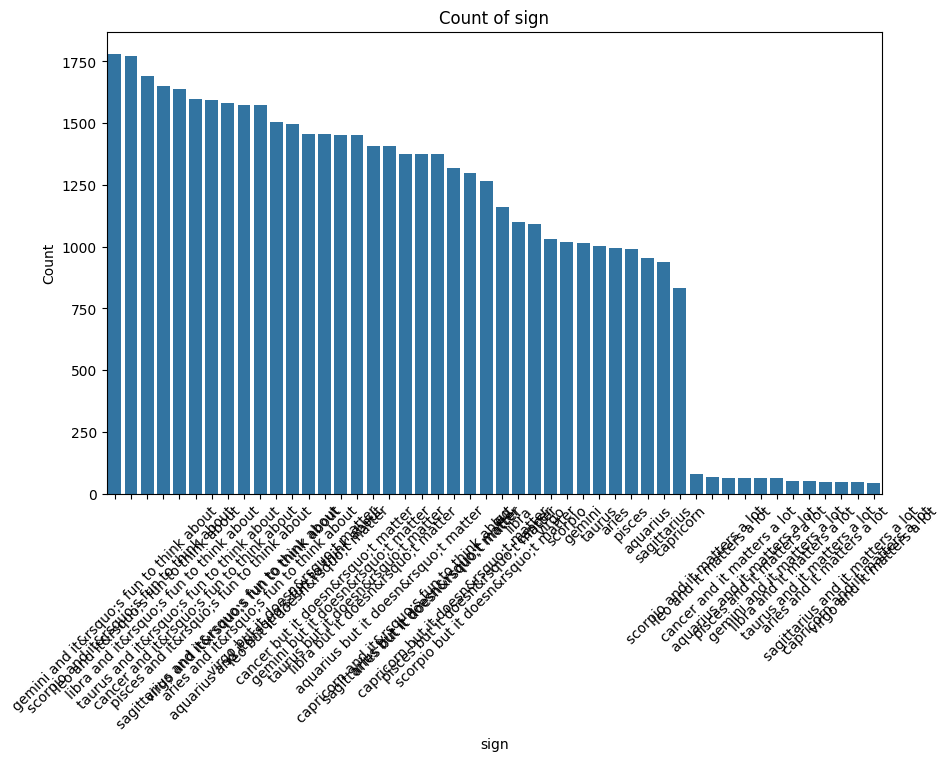

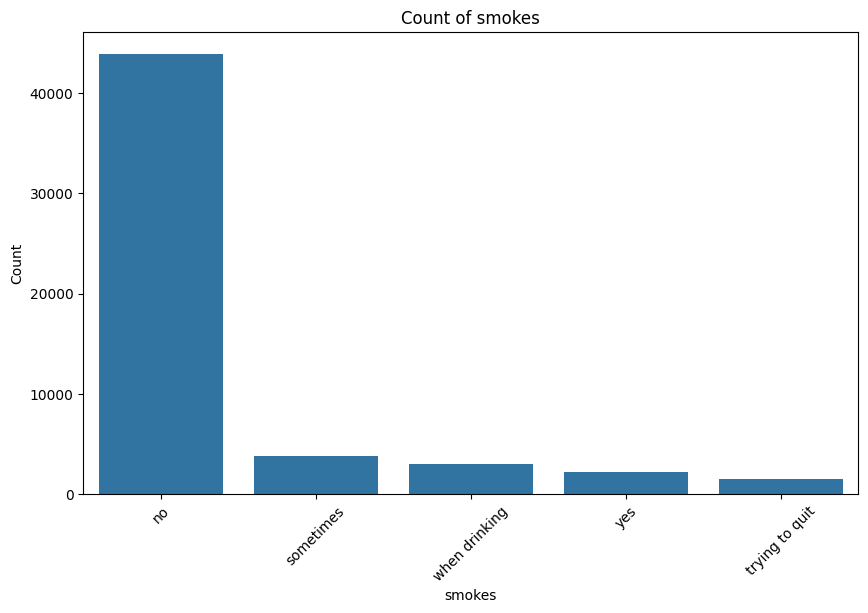

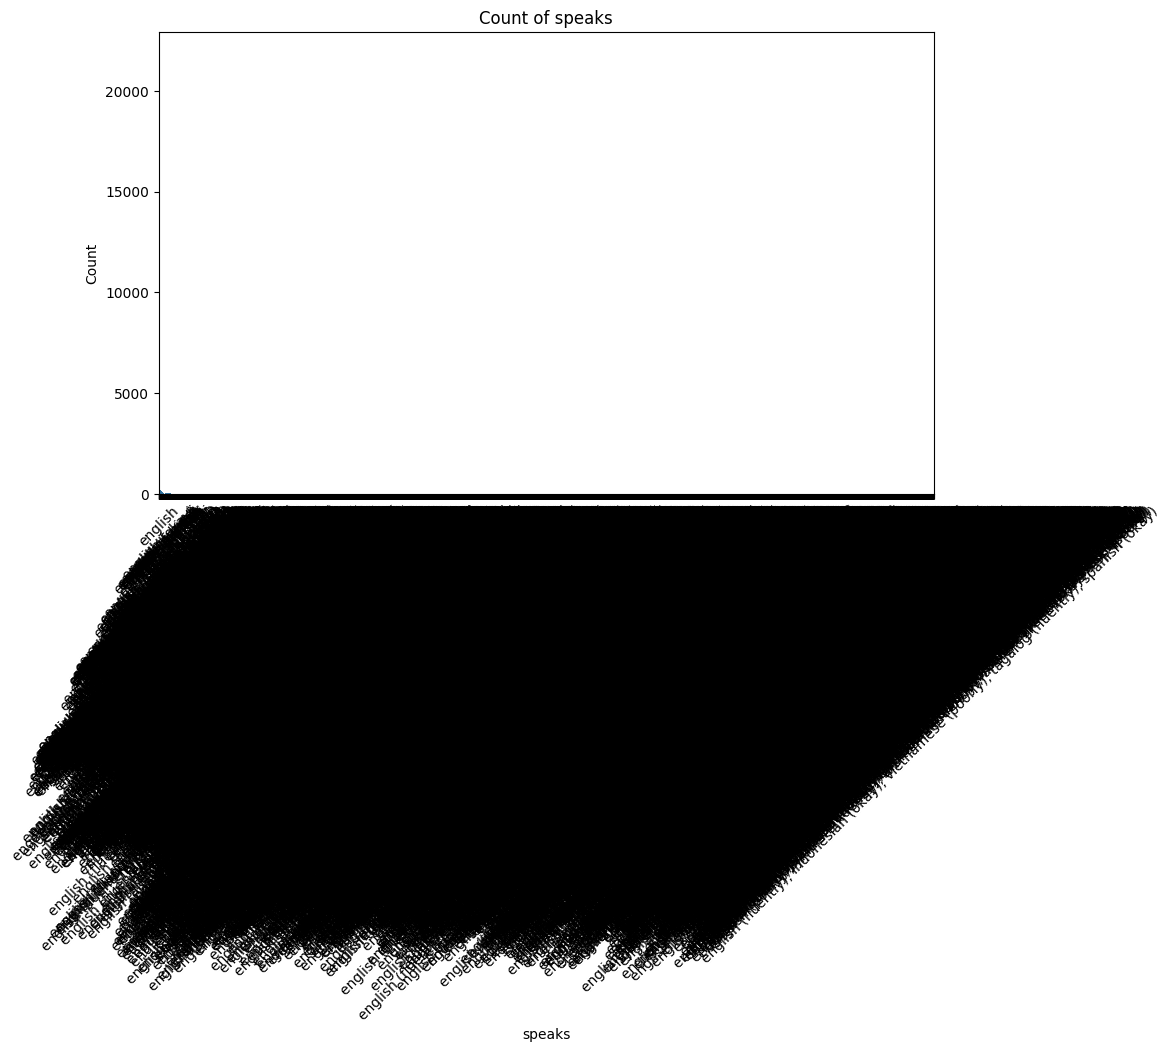

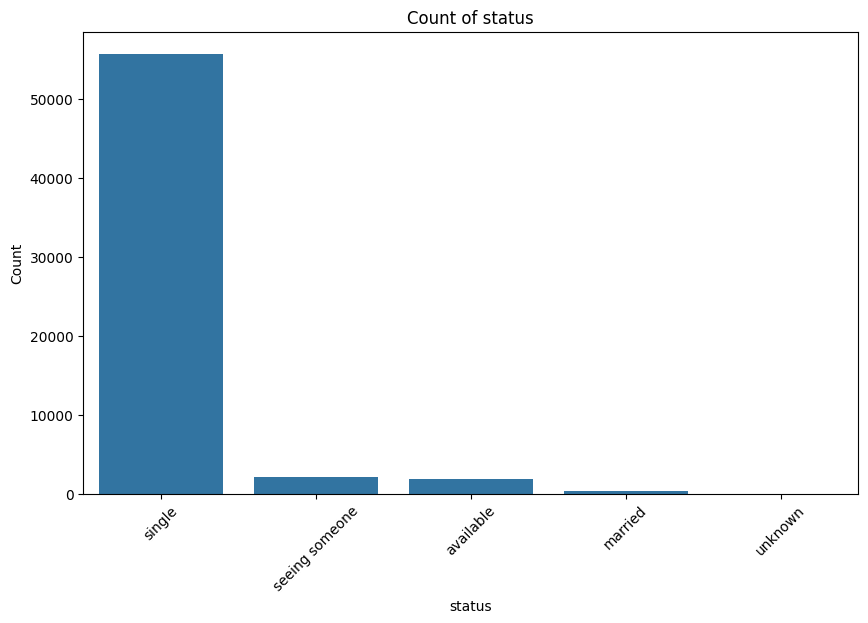

In [27]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if 'essay' not in col]  # Exclude 'essay' columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

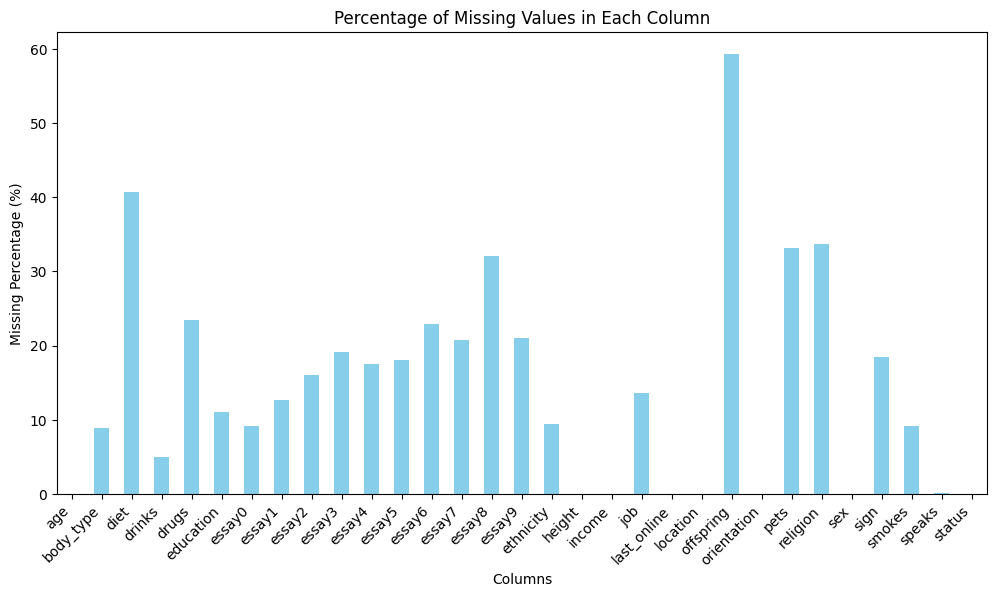

In [28]:
# Calculate percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# Plotting missing values percentage using a bar plot
plt.figure(figsize=(12, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.show()


For now we will drop all nulls. However, if the model is not performing up to expectations we will drop nas whose percentage is below 25 and impute the other missing values with either the mean if it is an int or with the mode if it is an object

In [4]:
df = df.dropna()

We will join the essay columns to have just one:

In [5]:
# Concatenate text from all essay columns into a single column
df['all_essays'] = df[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']].apply(lambda x: ' '.join(x.dropna()), axis=1)

# Drop the individual essay columns if desired
df = df.drop(columns=['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9'])

In [42]:
df.info() #checkcing that there are no null values left

<class 'pandas.core.frame.DataFrame'>
Index: 4407 entries, 0 to 59944
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          4407 non-null   int64  
 1   body_type    4407 non-null   object 
 2   diet         4407 non-null   object 
 3   drinks       4407 non-null   object 
 4   drugs        4407 non-null   object 
 5   education    4407 non-null   object 
 6   ethnicity    4407 non-null   object 
 7   height       4407 non-null   float64
 8   income       4407 non-null   int64  
 9   job          4407 non-null   object 
 10  last_online  4407 non-null   object 
 11  location     4407 non-null   object 
 12  offspring    4407 non-null   object 
 13  orientation  4407 non-null   object 
 14  pets         4407 non-null   object 
 15  religion     4407 non-null   object 
 16  sex          4407 non-null   object 
 17  sign         4407 non-null   object 
 18  smokes       4407 non-null   object 
 19  speaks    

In [6]:
# Drop the 'all_essays' column
df = df.drop(columns=['all_essays'])

In [7]:
# Label encode categorical variables
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

In [8]:
# Compute cosine similarity matrix based on profile features
cosine_sim = cosine_similarity(df)

# Convert cosine similarity matrix to DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, index=df.index, columns=df.index)

# Take the mean similarity across rows to get the predicted ratings
df['rating'] = cosine_sim_df.mean(axis=1)

# Normalize the ratings to be between 0 and 1
df['rating'] = (df['rating'] - df['rating'].min()) / (df['rating'].max() - df['rating'].min())


In [20]:
df

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,rating
0,22,0,9,4,0,20,34,75.0,-1,19,...,2,2,14,3,1,16,1,0,3,0.968425
19,33,1,2,4,0,11,103,72.0,-1,17,...,0,2,14,19,1,30,0,1,3,0.969992
22,30,4,2,4,0,8,103,69.0,-1,7,...,2,2,14,2,1,35,0,1130,3,0.931594
94,29,4,2,4,2,8,103,67.0,40000,0,...,4,2,14,3,1,24,0,1,3,0.454020
98,31,3,0,4,2,11,103,66.0,-1,7,...,2,2,11,5,0,28,0,1,3,0.969578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59904,33,0,5,1,0,15,103,66.0,-1,2,...,9,2,10,43,0,8,0,1,3,0.968385
59907,24,9,0,4,2,8,103,72.0,20000,0,...,0,2,11,7,1,42,1,677,3,0.555580
59913,29,5,2,4,0,8,36,64.0,-1,7,...,0,2,14,1,0,27,0,749,3,0.997717
59942,24,4,2,2,2,20,104,72.0,-1,6,...,0,2,14,0,1,23,0,1,3,0.969453


# Implementing LightGBM

In [89]:
import os
import sys
import numpy as np
import lightgbm as lgb
import pandas as pd
import category_encoders as ce
from tempfile import TemporaryDirectory
from sklearn.metrics import roc_auc_score, log_loss

import lightgbm_utils as lgb_utils

print("System version: {}".format(sys.version))
print("LightGBM version: {}".format(lgb.__version__))

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.System version: 3.9.6 (default, Sep 26 2022, 11:37:49) 
[Clang 14.0.0 (clang-1400.0.29.202)]
LightGBM version: 3.3.5



In [91]:
path = "profiles.csv"

df_lgbm = pd.read_csv(path)

In [92]:
# Concatenate text from all essay columns into a single column
df_lgbm['all_essays'] = df_lgbm[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']].apply(lambda x: ' '.join(x.dropna()), axis=1)

# Drop the individual essay columns if desired
df_lgbm = df_lgbm.drop(columns=['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9'])

# Drop the 'all_essays' column
df_lgbm = df_lgbm.drop(columns=['all_essays'])

In [76]:
#df_lgbm = df_lgbm.dropna()

In [93]:
merged_df = df_lgbm.merge(df[['rating']], how='left', left_index=True, right_index=True)

In [94]:
merged_df

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,rating
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,0.968425
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,NaN
2,38,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,NaN
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,NaN
4,29,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,NaN,NaN,socially,never,graduated from college/university,NaN,62.0,-1,sales / marketing / biz dev,...,has kids,straight,has dogs,catholicism but not too serious about it,f,cancer and it&rsquo;s fun to think about,no,english,single,NaN
59942,24,fit,mostly anything,often,sometimes,working on college/university,"white, other",72.0,-1,entertainment / media,...,doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,leo but it doesn&rsquo;t matter,no,english (fluently),single,0.969453
59943,42,average,mostly anything,not at all,never,graduated from masters program,asian,71.0,100000,construction / craftsmanship,...,doesn&rsquo;t have kids,straight,NaN,christianity but not too serious about it,m,sagittarius but it doesn&rsquo;t matter,no,english (fluently),single,NaN
59944,27,athletic,mostly anything,socially,often,working on college/university,"asian, black",73.0,-1,medicine / health,...,"doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), spanish (poorly), chinese ...",single,0.902161


In [95]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   ethnicity    54266 non-null  object 
 7   height       59943 non-null  float64
 8   income       59946 non-null  int64  
 9   job          51748 non-null  object 
 10  last_online  59946 non-null  object 
 11  location     59946 non-null  object 
 12  offspring    24385 non-null  object 
 13  orientation  59946 non-null  object 
 14  pets         40025 non-null  object 
 15  religion     39720 non-null  object 
 16  sex          59946 non-null  object 
 17  sign         48890 non-null  object 
 18  smokes       54434 non-null  object 
 19  spea

In [96]:
nume_cols = ["age", "height", "income"]

# Define the categorical columns
cate_cols = ["body_type", "diet", "drinks", "drugs", "education", "ethnicity", "job", "last_online",
             "location", "offspring", "orientation", "pets", "religion", "sex", "sign", "smokes",
             "speaks", "status"]

# Define the label column
label_col = "rating"

# Combine all columns
columns = [label_col] + nume_cols + cate_cols

# Subset the DataFrame with the selected columns
selected_df = merged_df[columns]

# Display the selected DataFrame
display(selected_df.head())


,rating,age,height,income,body_type,diet,drinks,drugs,education,ethnicity,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,0.968425,22,75.0,-1,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,NaN,35,70.0,80000,average,mostly other,often,sometimes,working on space camp,white,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,NaN,38,68.0,-1,thin,anything,socially,NaN,graduated from masters program,NaN,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,NaN,23,71.0,20000,thin,vegetarian,socially,NaN,working on college/university,white,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,NaN,29,66.0,-1,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [97]:
MAX_LEAF = 128
MIN_DATA = 50
NUM_OF_TREES = 100
TREE_LEARNING_RATE = 0.1
EARLY_STOPPING_ROUNDS = 50
METRIC = "auc"
SIZE = "sample"

In [63]:
params = {
    "task": "train",
    "boosting_type": "gbdt",
    "num_class": 1,
    "objective": "binary",
    "metric": METRIC,
    "num_leaves": MAX_LEAF,
    "min_data": MIN_DATA,
    "boost_from_average": True,
    # set it according to your cpu cores.
    "num_threads": 20,
    "feature_fraction": 0.8,
    "learning_rate": TREE_LEARNING_RATE,
}

In [98]:
params = {
    "task": "train",
    "boosting_type": "gbdt",
    "num_class": 1,
    "objective": "binary",
    "metric": METRIC,
    "num_leaves": MAX_LEAF,
    "min_data": MIN_DATA,
    "boost_from_average": True,
    "num_threads": 2,  # Set according to your CPU cores
    "feature_fraction": 0.8,
    "learning_rate": TREE_LEARNING_RATE,
}

In [99]:
# split data to 3 sets    
length = len(merged_df)
train_data = merged_df.loc[:0.8*length-1]
valid_data = merged_df.loc[0.8*length:0.9*length-1]
test_data = merged_df.loc[0.9*length:]

In [100]:
ord_encoder = ce.ordinal.OrdinalEncoder(cols=cate_cols)

def encode_csv(df, encoder, label_col, typ="fit"):
    if typ == "fit":
        df = encoder.fit_transform(df)
    else:
        df = encoder.transform(df)
    y = df[label_col].values
    del df[label_col]
    return df, y

train_x, train_y = encode_csv(train_data, ord_encoder, label_col)
valid_x, valid_y = encode_csv(valid_data, ord_encoder, label_col, "transform")
test_x, test_y = encode_csv(test_data, ord_encoder, label_col, "transform")

print("Train Data Shape: X: {trn_x_shape}; Y: {trn_y_shape}.\nValid Data Shape: X: {vld_x_shape}; Y: {vld_y_shape}.\nTest Data Shape: X: {tst_x_shape}; Y: {tst_y_shape}.\n"
      .format(trn_x_shape=train_x.shape,
              trn_y_shape=train_y.shape,
              vld_x_shape=valid_x.shape,
              vld_y_shape=valid_y.shape,
              tst_x_shape=test_x.shape,
              tst_y_shape=test_y.shape,))
train_x.head()

Train Data Shape: X: (47956, 21); Y: (47956,).
Valid Data Shape: X: (5994, 21); Y: (5994,).
Test Data Shape: X: (5994, 21); Y: (5994,).



,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,1,1,1,1,1,1,75.0,-1,1,...,1,1,1,1,1,1,1,1,1,1
1,35,2,2,2,2,2,2,70.0,80000,2,...,2,1,1,1,2,1,2,2,2,1
2,38,3,3,1,4,3,202,68.0,-1,22,...,3,16,1,2,46,1,3,2,3,2
3,23,3,4,1,4,1,2,71.0,20000,3,...,4,2,1,3,46,1,4,2,4,1
4,29,4,19,1,1,4,3,66.0,-1,4,...,3,16,1,1,46,1,5,2,1,1


In [101]:
lgb_train = lgb.Dataset(train_x, train_y.reshape(-1), params=params, categorical_feature=cate_cols)
lgb_valid = lgb.Dataset(valid_x, valid_y.reshape(-1), reference=lgb_train, categorical_feature=cate_cols)
lgb_test = lgb.Dataset(test_x, test_y.reshape(-1), reference=lgb_train, categorical_feature=cate_cols)
lgb_model = lgb.train(params,
                      lgb_train,
                      num_boost_round=NUM_OF_TREES,
                      valid_sets=lgb_valid,
                      categorical_feature=cate_cols,
                      callbacks=[lgb.early_stopping(EARLY_STOPPING_ROUNDS)])

[LightGBM] [Info] Number of positive: 3557, number of negative: 44399
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5176
[LightGBM] [Info] Number of data points in the train set: 47956, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.074172 -> initscore=-2.524299
[LightGBM] [Info] Start training from score -2.524299
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds


/Users/marianareyes/Library/Python/3.9/lib/python/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/marianareyes/Library/Python/3.9/lib/python/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


Did not meet early stopping. Best iteration is:
[55]	valid_0's auc: 0.9792


In [86]:
test_preds = lgb_model.predict(test_x)
#auc = roc_auc_score(np.asarray(test_y.reshape(-1)), np.asarray(test_preds))
#logloss = log_loss(np.asarray(test_y.reshape(-1)), np.asarray(test_preds), eps=1e-12)
#res_basic = {"auc": auc, "logloss": logloss}
#print(res_basic)

# Finding Recommendations given a profile

In [106]:
def get_top_similar_profiles_from_index(profile_index, model, encoder, cate_cols, top_n=10):
    # Retrieve the profile from the DataFrame using the index
    profile = merged_df.iloc[profile_index].to_dict()
    
    # Encode the profile using the same encoder
    encoded_profile, _ = encode_csv(pd.DataFrame([profile]), encoder, label_col="", typ="transform")
    
    # Predict rating for the given profile
    rating = model.predict(encoded_profile)[0]
    
    # Get similar profiles based on predicted ratings
    similar_profiles = []
    for index, row in merged_df.iterrows():
        if index == profile_index:
            continue  # Skip the profile itself
        encoded_row, _ = encode_csv(pd.DataFrame([row]), encoder, label_col="", typ="transform")
        row_rating = model.predict(encoded_row)[0]
        similarity_score = abs(row_rating - rating)
        similar_profiles.append((index, similarity_score))
    
    # Sort profiles based on similarity scores
    similar_profiles.sort(key=lambda x: x[1])
    
    # Get top similar profiles
    top_similar_profiles = []
    for index, _ in similar_profiles[:top_n]:
        top_similar_profiles.append(df_lgbm.iloc[index])
    
    return top_similar_profiles

In [108]:
profile_index = 0  # Index of the profile in the DataFrame
top_similar_profiles = get_top_similar_profiles_from_index(profile_index, lgb_model, ord_encoder, cate_cols)
print("Top 10 similar profiles:")
for index, similar_profile in enumerate(top_similar_profiles, start=1):
    print(f"Similar Profile {index}:")
    print(similar_profile)

KeyError: ''

In [109]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   ethnicity    54266 non-null  object 
 7   height       59943 non-null  float64
 8   income       59946 non-null  int64  
 9   job          51748 non-null  object 
 10  last_online  59946 non-null  object 
 11  location     59946 non-null  object 
 12  offspring    24385 non-null  object 
 13  orientation  59946 non-null  object 
 14  pets         40025 non-null  object 
 15  religion     39720 non-null  object 
 16  sex          59946 non-null  object 
 17  sign         48890 non-null  object 
 18  smokes       54434 non-null  object 
 19  spea